Приведем подробные инструкции для решения поставленной задачи.

Подключим сначала все необходимые библиотеки. 

Сначала установим необходимые модули.

In [41]:
!pip install --upgrade pip
!pip install imutils
!pip install opencv-python

In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from IPython.display import Image
from imutils import paths
import numpy as np
import cv2
import os

Для работы с изображениями, найдем их гистограммы — характеристики распределения интенсивности изображения. Для этого можно воспользоваться следующим методом.

In [43]:
def extract_histogram(image, bins=(8, 8, 8)):
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

Считаем изображения из корневой папки train и вычислим гистограмму каждого изображения. Кроме того, отделим метку каждого изображения. Обработка большого числа изображений в облачных сервисах занимает длительное время (1-5 минут).

In [44]:
imagePaths = sorted(list(paths.list_images('train')))
data = []
labels = []

for (i, imagePath) in enumerate(imagePaths):
    image = cv2.imread(imagePath, 1)
    label = imagePath.split(os.path.sep)[-1].split(".")[0]
    hist = extract_histogram(image)
    data.append(hist)
    labels.append(label)

Преобразуем метки в удобный формат 0 и 1 и посмотрим, какой код и какая метка соответствует самой первой попавшейся нам картинке 

0


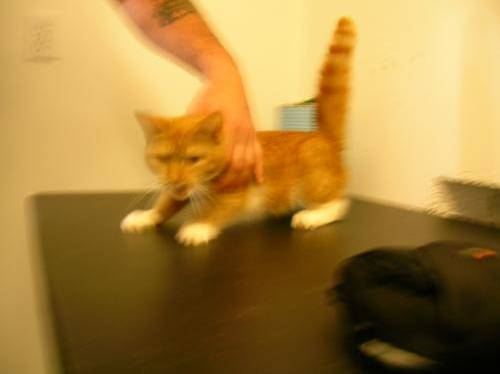

In [45]:
le = LabelEncoder()
labels = le.fit_transform(labels)
print(labels[0])
Image(filename=imagePaths[0])

Видно, что классом ноль у нас занумерованы коты (кошки).
Разделим выборку на тренировочную и тестовую в отношении 75/25 с параметром random_state = 51.

In [46]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(data), labels, test_size=0.25, random_state=51)

Теперь обучим модель почти-разделяющий гиперплосоксти на наших данных, а также оценим ее на тестовых. Параметр C обратно пропорционален параметру модели, про который говорилось в лекции.

In [47]:
model = LinearSVC(random_state = 51, C = 1)
model.fit(trainData, trainLabels)

LinearSVC(C=1, random_state=51)

In [48]:
predictions = model.predict(testData)

In [49]:
print(classification_report(testLabels, predictions, target_names=le.classes_))

              precision    recall  f1-score   support

         cat       0.48      0.91      0.62        11
         dog       0.75      0.21      0.33        14

    accuracy                           0.52        25
   macro avg       0.61      0.56      0.48        25
weighted avg       0.63      0.52      0.46        25



In [50]:
from sklearn.metrics import f1_score
predictions = model.predict(testData)
f1_score(testLabels, predictions, average='macro')

0.47916666666666663

Выведем коэффициент $\theta_1$ построенной гиперплоскости:

In [51]:
model.coef_[0][1]

-0.3950115672912521

Вычислим предсказания для объекта из папки test

In [52]:
singleImage = cv2.imread('prediction/cat.12495.jpg')
histt = extract_histogram(singleImage)
histt2 = histt.reshape(1, -1)
prediction = model.predict(histt2)

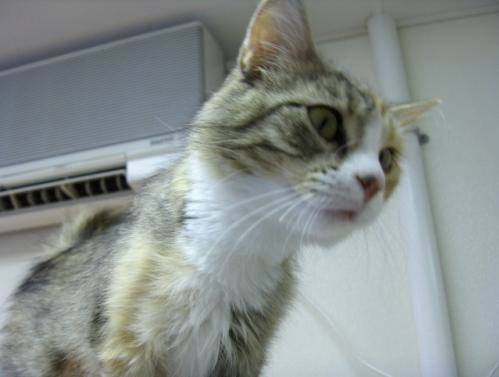

In [53]:
Image(filename='prediction/cat.12495.jpg')

In [54]:
prediction

array([1], dtype=int64)

Видно, что построенный классификатор успешно справился с заданием.